<a href="https://colab.research.google.com/github/HakureiPOI/Modeling_Allowance/blob/main/Denoise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
np.random.seed(42)  # 设置随机种子
time = np.linspace(0, 1, 1000)  # 时间轴
signal = np.sin(2 * np.pi * 50 * time)  # 原始信号 (50Hz正弦波)
noise = np.random.normal(0, 0.5, size=signal.shape)  # 添加噪声
noisy_signal = signal + noise  # 含噪信号

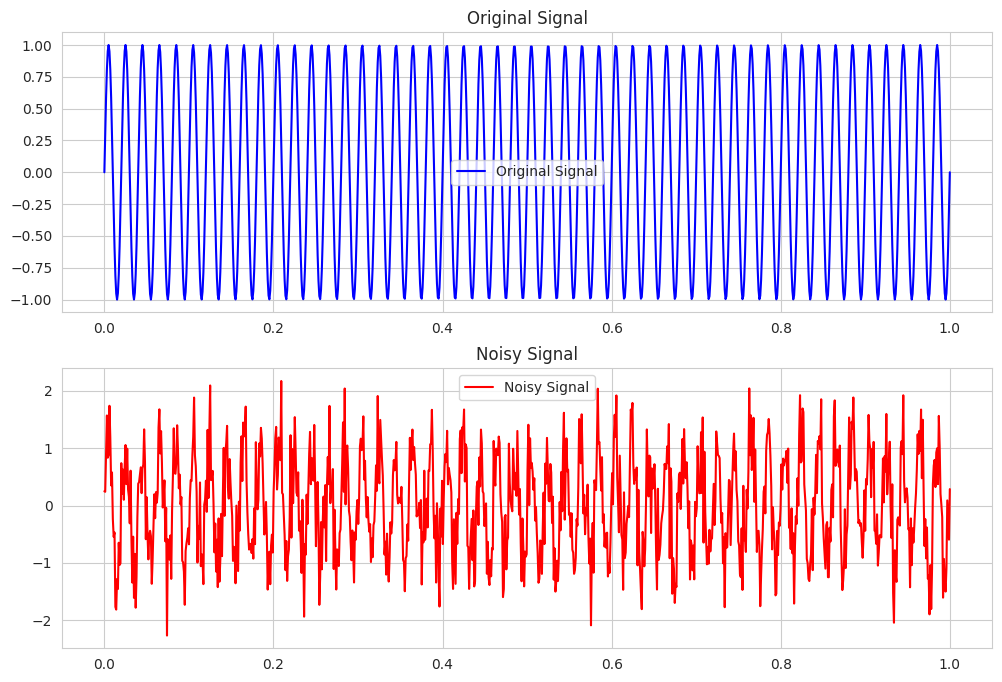

In [3]:
sns.set_style('whitegrid')
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.title("Original Signal")
plt.plot(time, signal, color='blue', label='Original Signal')
plt.legend()

plt.subplot(2, 1, 2)
plt.title("Noisy Signal")
plt.plot(time, noisy_signal, color='red', label='Noisy Signal')
plt.legend()

---

In [4]:
from scipy.signal import butter, filtfilt

# 创建低通滤波器
def butter_lowpass_filter(data, cutoff, fs, order=5):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y

# 应用低通滤波
fs = 1000  # 采样率
cutoff = 60  # 截止频率
denoised_signal_lowpass = butter_lowpass_filter(noisy_signal, cutoff, fs)

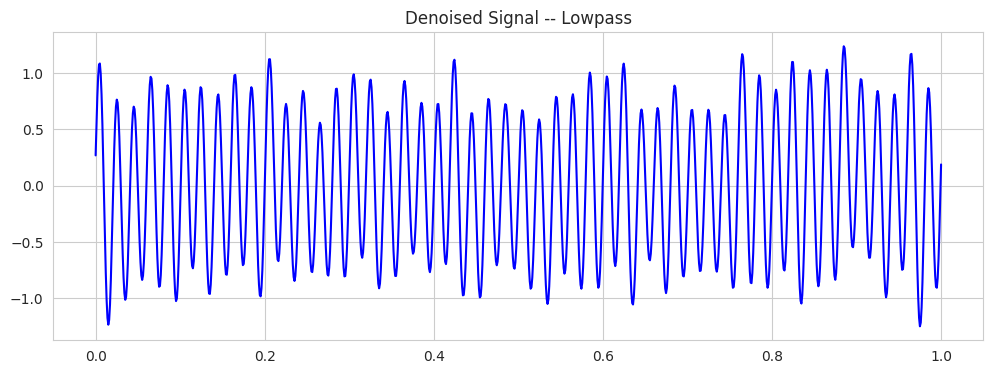

In [5]:
plt.figure(figsize=(12, 4))
plt.title("Denoised Signal -- Lowpass")
plt.plot(time, denoised_signal_lowpass, color='blue', label='Denoised Signal')
plt.show()

---

In [6]:
!pip install PyWavelets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 32.9 MB/s eta 0:00:00


In [7]:
import pywt

def wavelet_denoising(data, wavelet='db4', level=3, threshold=0.2):
    coeffs = pywt.wavedec(noisy_signal, wavelet, level=level)  # 小波分解
    coeffs_denoised = [pywt.threshold(c, threshold, mode='soft') for c in coeffs]
    return pywt.waverec(coeffs_denoised, wavelet)

denoised_signal_wavelet = wavelet_denoising(noisy_signal)

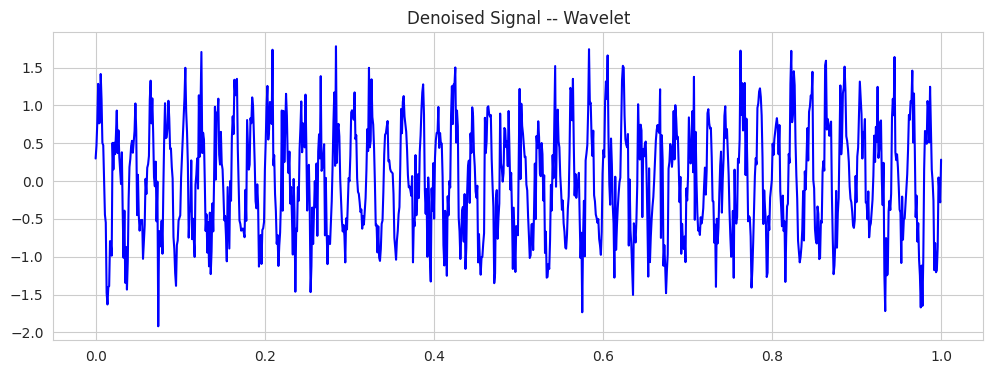

In [8]:
plt.figure(figsize=(12, 4))
plt.title("Denoised Signal -- Wavelet")
plt.plot(time, denoised_signal_wavelet, color='blue', label='Denoised Signal')
plt.show()

---

In [9]:
def moving_average(signal, window_size=10):
    return np.convolve(signal, np.ones(window_size)/window_size, mode='same')

denoised_signal_moving = moving_average(noisy_signal)

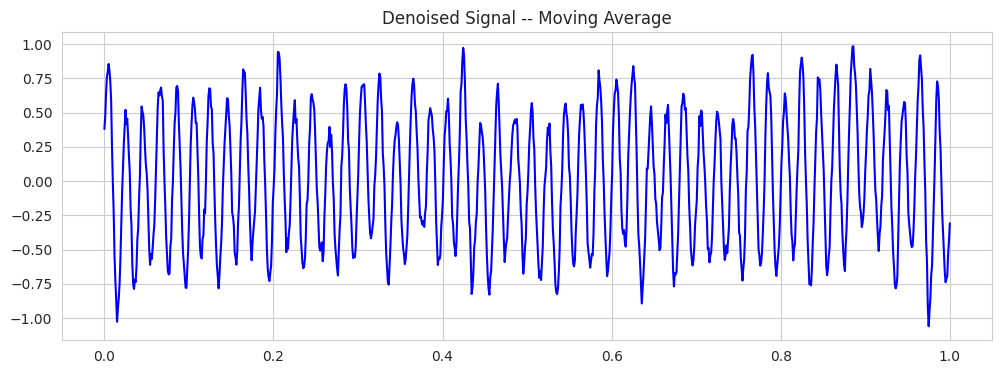

In [10]:
plt.figure(figsize=(12, 4))
plt.title("Denoised Signal -- Moving Average")
plt.plot(time, denoised_signal_moving, color='blue', label='Denoised Signal')
plt.show()

---

In [11]:
def fft_denoising(signal, fs):
    fft_coeffs = np.fft.fft(noisy_signal)
    frequencies = np.fft.fftfreq(len(noisy_signal), d=1/fs)
    cutoff = 60  # 60Hz 截止频率

    # 去除高频成分
    fft_coeffs[np.abs(frequencies) > cutoff] = 0

    # Take the real part of the IFFT output
    return np.real(np.fft.ifft(fft_coeffs))

denoised_signal_fft = fft_denoising(noisy_signal, fs)

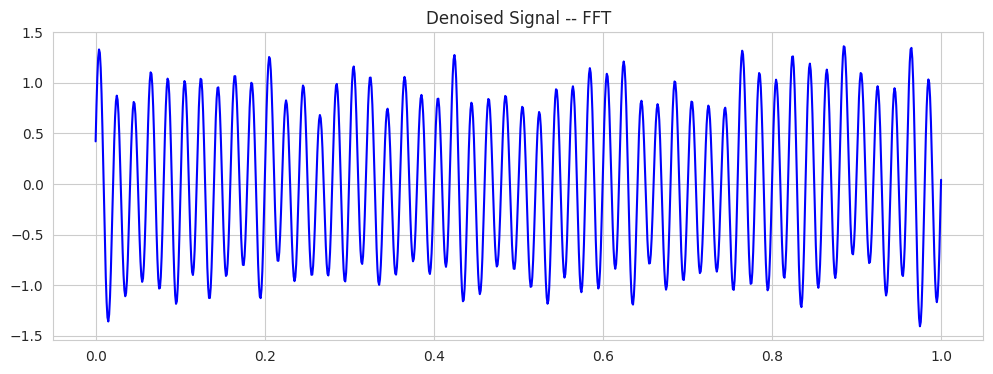

In [12]:
plt.figure(figsize=(12, 4))
plt.title("Denoised Signal -- FFT")
plt.plot(time, denoised_signal_fft, color='blue', label='Denoised Signal')
plt.show()

---

In [13]:
!pip install pykalman

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.6/251.6 kB 6.0 MB/s eta 0:00:00


In [14]:
from pykalman import KalmanFilter

def kalman_denoising(signal):
    kf = KalmanFilter(initial_state_mean=0, n_dim_obs=1)
    kf = kf.em(noisy_signal, n_iter=10)
    denoised_signal, _ = kf.smooth(signal)
    return denoised_signal

denoised_signal_kalman = kalman_denoising(noisy_signal)

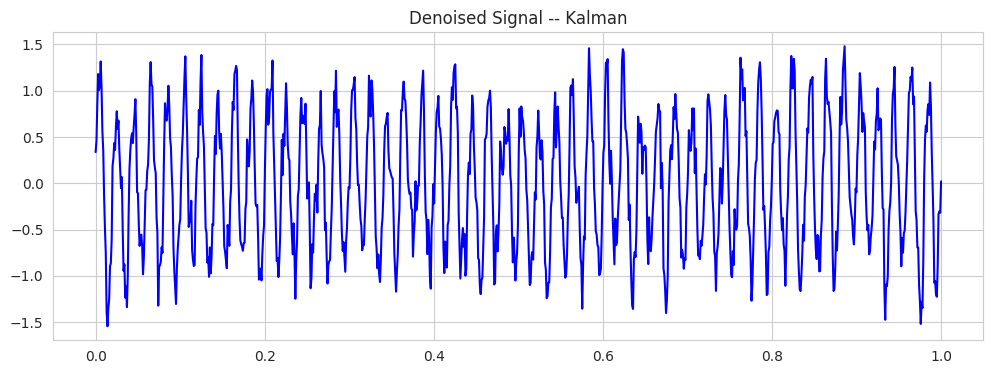

In [15]:
plt.figure(figsize=(12, 4))
plt.title("Denoised Signal -- Kalman")
plt.plot(time, denoised_signal_kalman, color='blue', label='Denoised Signal')
plt.show()

---

In [16]:
from scipy.linalg import svd

def svd_denoise(signal, rank):
    U, S, Vt = svd(signal.reshape(-1, 1), full_matrices=False)
    S[rank:] = 0  # 仅保留前几个奇异值
    return (U @ np.diag(S) @ Vt).flatten()

denoised_signal_svd = svd_denoise(noisy_signal, rank=5)

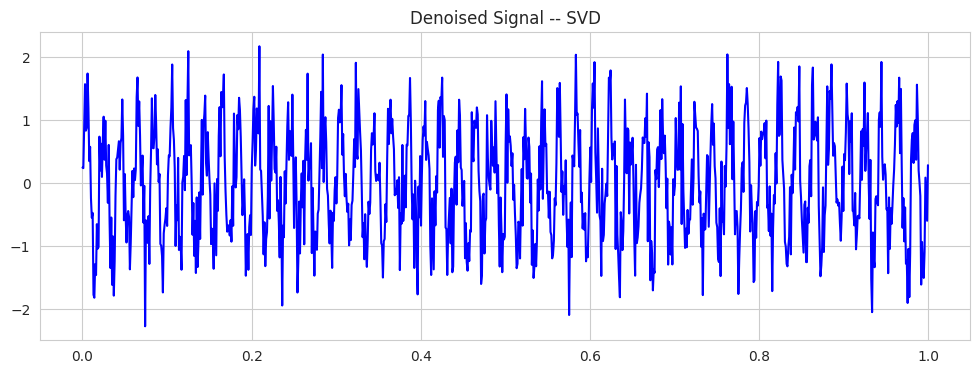

In [17]:
plt.figure(figsize=(12, 4))
plt.title("Denoised Signal -- SVD")
plt.plot(time, denoised_signal_svd, color='blue', label='Denoised Signal')
plt.show()